Lattice
    abc : 8.443372880857972 7.966511408055687 8.443373046836241
 angles : 90.05904825882041 87.17143244444733 89.94095236763584
 volume : 567.2443801419702
      A : -1.3679615537732492 6.115904466645179 5.658174559650459
      B : 7.740611141630671 -2.90691378e-08 1.8836780958392318
      C : 1.3679615362977207 6.115904578889521 -5.658174690230841
    pbc : True True True

Lattice
    abc : 8.25642937864334 8.261326068756537 8.250218767528876
 angles : 90.22844734247862 90.33172712654462 90.17459977571463
 volume : 562.723070403832
      A : -1.3956805831512207 5.821423364937526 5.686099876057312
      B : 8.026812511067133 -0.0201790468647151 1.9543239579353502
      C : 1.3659365005907795 5.816664271232974 -5.689177791579488
    pbc : True True True

Lattice
    abc : 8.45097627929749 7.990854259364982 8.45097627929749
 angles : 90.05024238573148 87.22059401122242 89.94975761426852
 volume : 570.027007908202
      A : -1.37043661225 6.11891174315 5.66567053795
      B : 7.764477112716667 -0.0 1.8885568459833335
      C : 1.37043661225 6.11891174315 -5.66567053795
    pbc : True True True

Lattice
    abc : 8.265043058857406 8.303506511213492 8.280980595801065
 angles : 89.86781122252671 90.12743124239589 89.95900132286023
 volume : 568.3110171467489
      A : -1.3791811457658212 5.837885404764955 5.685762053829143
      B : 8.069563507569585 0.0087055417775458 1.9571125140390997
      C : 1.3943022319028784 5.848894953365083 -5.693943162575903
    pbc : True True True

Lattice
    abc : 8.45097627929749 7.990854259364982 8.45097627929749
 angles : 90.05024238573148 87.22059401122242 89.94975761426852
 volume : 570.027007908202
      A : -1.37043661225 6.11891174315 5.66567053795
      B : 7.764477112716667 -0.0 1.8885568459833335
      C : 1.37043661225 6.11891174315 -5.66567053795
    pbc : True True True

Lattice
    abc : 8.323007926070183 8.339504510375248 8.325459717170109
 angles : 89.56538813427956 89.55032503531075 90.10977734126129
 volume : 577.8326297038025
      A : -1.3508281338999995 5.91283007275 5.69966357085
      B : 8.120206899300001 0.0012337518833332 1.8998878569500004
      C : 1.3975120743000007 5.90542756145 -5.69966357085
    pbc : True True True

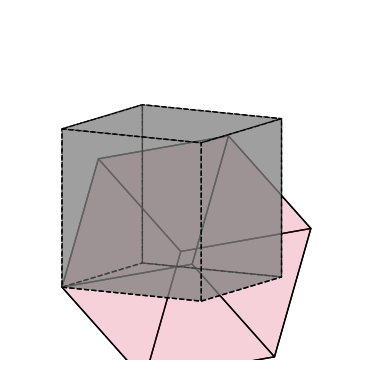

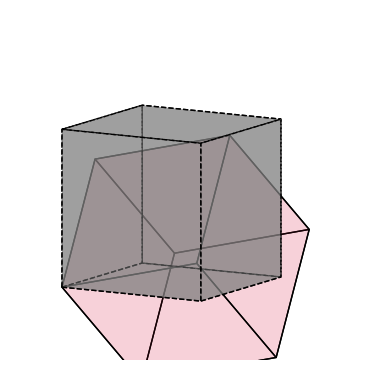

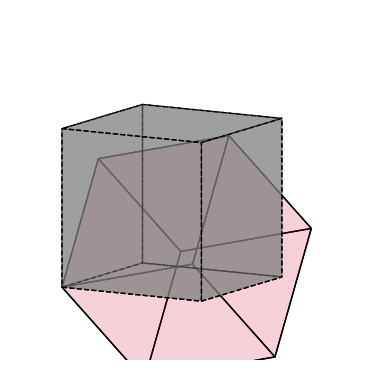

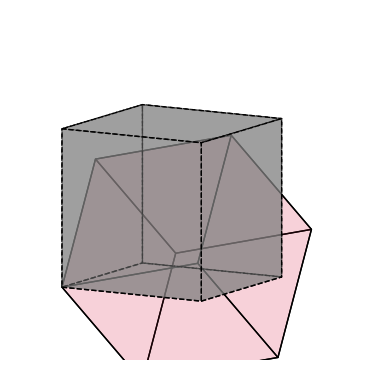

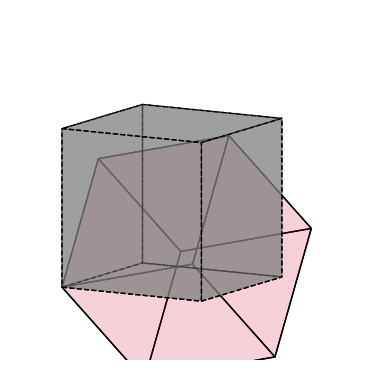

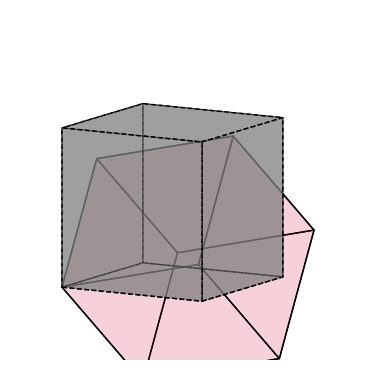

In [16]:
from pymatgen.core import Structure, Lattice
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def read_lattice_vectors(poscar_file):
    with open(poscar_file, 'r') as file:
        lines = file.readlines()
        # Assuming the lattice vectors start at line 3
        lattice_vectors = np.array([list(map(float, line.split())) for line in lines[2:5]])
    return lattice_vectors

def apply_transformation(lattice_vectors, transformation_matrix):
    return np.dot(transformation_matrix, lattice_vectors)

def write_new_poscar(old_poscar, new_lattice_vectors, new_poscar_file):
    with open(old_poscar, 'r') as file:
        lines = file.readlines()
    
    # Replace old lattice vectors with new ones
    for i in range(3):
        lines[2 + i] = ' '.join(map(str, new_lattice_vectors[i])) + '\n'
    
    with open(new_poscar_file, 'w') as file:
        file.writelines(lines)

def read_poscar_lattice(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        lattice_vectors = np.array([list(map(float, line.split())) for line in lines[2:5]])
    return lattice_vectors

def plot_lattice_with_cubic_comparison(lattice_vectors,fname):
    fig = plt.figure(dpi=200,figsize=(2,2))
    ax = fig.add_subplot(111,aspect='equal',projection='3d', proj_type='ortho')
    
    plot_lattice(ax, lattice_vectors, 'crimson',0.1,'-')
    
    volume = np.linalg.det(lattice_vectors)
    cubic_side = volume**(1/3)  
    cubic_lattice = np.array([[cubic_side, 0, 0], [0, cubic_side, 0], [0, 0, cubic_side]])
    plot_lattice(ax, cubic_lattice, 'grey',0.5,'--')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    ax.set_zlim(0,10)
#     plt.savefig(fname, transparent=True,dpi=200)
    plt.show()

def transform_to_upper_triangular(lattice_vectors):
    # Extract the three vectors
    vec1 = lattice_vectors[0]
    vec2 = lattice_vectors[1]
    vec3 = lattice_vectors[2]

    # Step 1: Normalize the first vector to align along the x-axis
    new_vec1 = np.array([np.linalg.norm(vec1), 0, 0])

    # Step 2: Project vec2 onto the new_vec1 direction and adjust to form a new vector in the x-y plane
    proj_vec2_on_vec1 = np.dot(vec2, vec1) / np.dot(vec1, vec1) * vec1
    new_vec2 = vec2 - proj_vec2_on_vec1
    new_vec2 = np.array([np.dot(vec2, vec1) / np.linalg.norm(vec1), np.linalg.norm(new_vec2), 0])

    # Step 3: Adjust vec3 to be orthogonal to both vec1 and vec2, forming a vector in the full space
    proj_vec3_on_vec1 = np.dot(vec3, vec1) / np.dot(vec1, vec1) * vec1
    proj_vec3_on_vec2 = np.dot(vec3, vec2) / np.dot(vec2, vec2) * vec2
    new_vec3 = vec3 - proj_vec3_on_vec1 - proj_vec3_on_vec2
    new_vec3 = np.array([np.dot(vec3, vec1) / np.linalg.norm(vec1), 
                         np.dot(vec3, vec2) / np.linalg.norm(new_vec2), 
                         np.linalg.norm(new_vec3)])

    # Combine into upper triangular matrix format
    upper_triangular_vectors = np.array([new_vec1, new_vec2, new_vec3])
    return upper_triangular_vectors

def orthogonalize_and_save_poscar(input_filename, output_filename):
    structure = Structure.from_file(input_filename)
    lattice_vectors = np.array(structure.lattice.matrix)
    new_lattice = Lattice(transform_to_upper_triangular(lattice_vectors))
    new_structure = Structure(new_lattice, structure.species, structure.frac_coords, site_properties=structure.site_properties)
    new_structure.to(filename=output_filename, fmt="poscar")

input_filename = "POSCAR"  # Replace with the path to your input POSCAR file
output_filename = "orthogonalized_POSCAR.vasp"  # Output file name
orthogonalize_and_save_poscar(input_filename, output_filename)

def plot_lattice(ax, lattice_vectors, color, alpha, ls):
    points = np.array([[0, 0, 0],
                       lattice_vectors[0],
                       lattice_vectors[0] + lattice_vectors[1],
                       lattice_vectors[1],
                       lattice_vectors[2],
                       lattice_vectors[0] + lattice_vectors[2],
                       lattice_vectors[0] + lattice_vectors[1] + lattice_vectors[2],
                       lattice_vectors[1] + lattice_vectors[2]])
    
    # 격자를 구성하는 면 그리기
    verts = [[points[0], points[1], points[2], points[3]],
             [points[4], points[5], points[6], points[7]], 
             [points[0], points[1], points[5], points[4]], 
             [points[2], points[3], points[7], points[6]], 
             [points[1], points[2], points[6], points[5]],
             [points[0], points[3], points[7], points[4]]]
    
    ax.add_collection3d(Poly3DCollection(verts, facecolors=color, linestyle = ls, linewidths=0.5, edgecolors='k', alpha=alpha))
    plt.axis('off')
    plt.tight_layout()
    ax.view_init(10, 300)

for name in ['CONTCAR_B',
             'CONTCAR_G',
             'CONTCAR_B_VGa',
             'CONTCAR_G_VGa',
             'CONTCAR_B_4VGa',
             'CONTCAR_G_4VGa']:
    POSCAR1 = f'SC242/{name}.vasp'
    POSCAR2 = 'SC242/Mg(GaO2)2.vasp'
    POSCAR2_modified = f'SC242/{name}_tuned.vasp'

    sc_mat1 = [[-1/6,-1/4,1/6],
               [-1/6,1/4,1/6],
               [0,0,1/2]]
    sc_mat2 = [[1,-1, -1],
               [1, 1, -1],
               [ 1, -1, 1]]
    transformation_matrix = np.array(sc_mat1)  # Your transformation matrix
    lattice_vectors_poscar1 = read_lattice_vectors(POSCAR1)  # Path to your POSCAR1 file
    transformed_lattice_vectors = apply_transformation(lattice_vectors_poscar1, transformation_matrix)
    write_new_poscar(POSCAR2, transformed_lattice_vectors, POSCAR2_modified)  # Path to your POSCAR2 and output file
    struct = Structure.from_file(POSCAR2_modified)
    bulk_sc = struct * sc_mat2
    bulk_sc.to(fmt='poscar',filename=POSCAR2_modified)
    write_new_poscar(POSCAR2, read_lattice_vectors(POSCAR2_modified), POSCAR2_modified)
    struct = Structure.from_file(POSCAR2_modified)
    struct.to(fmt='poscar',filename=POSCAR2_modified)
    display(struct.lattice)

for name in ['CONTCAR_B',
             'CONTCAR_G',
             'CONTCAR_B_VGa',
             'CONTCAR_G_VGa',
             'CONTCAR_B_4VGa',
             'CONTCAR_G_4VGa']:
    POSCAR2_modified = f'SC242/{name}_tuned.vasp'

    lattice_vectors = read_poscar_lattice(POSCAR2_modified)
    fname = name

    plot_lattice_with_cubic_comparison(lattice_vectors,fname)
